In [3]:
# Question 1 
from palmerpenguins import load_penguins
import pandas as pd
import pkg_resources
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Load dataset
penguins = load_penguins()

# Display the first few rows
penguins.head()

# Filter for Adelie and Gentoo species
penguins = penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

# Drop missing values
penguins.dropna(inplace=True)

# Select features and target variable
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
nb_preds = nb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Accuracy
nb_acc = accuracy_score(y_test, nb_preds)
lr_acc = accuracy_score(y_test, lr_preds)

print(f"Naive Bayes Accuracy: {nb_acc}")
print(f"Logistic Regression Accuracy: {lr_acc}")

# Predicted probabilities
nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# AUC
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print(f"Naive Bayes AUC: {nb_auc}")
print(f"Logistic Regression AUC: {lr_auc}")

Naive Bayes Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Naive Bayes AUC: 1.0
Logistic Regression AUC: 1.0


Matplotlib is building the font cache; this may take a moment.


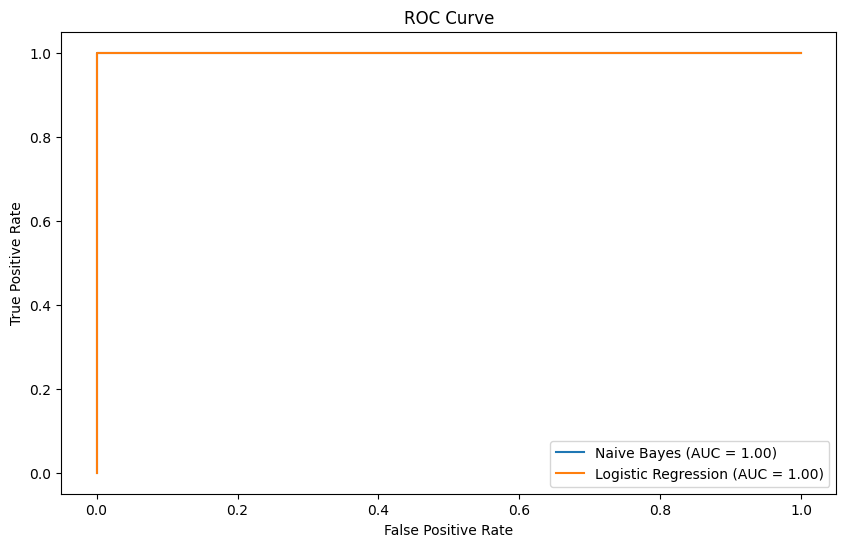

In [4]:
# Question 2
import matplotlib.pyplot as plt
# ROC curves
nb_fpr, nb_tpr, _ = roc_curve(y_test.map({'Adelie': 0, 'Gentoo': 1}), nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.map({'Adelie': 0, 'Gentoo': 1}), lr_probs)

plt.figure(figsize=(10, 6))
plt.plot(nb_fpr, nb_tpr, label="Naive Bayes (AUC = {:.2f})".format(nb_auc))
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:.2f})".format(lr_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

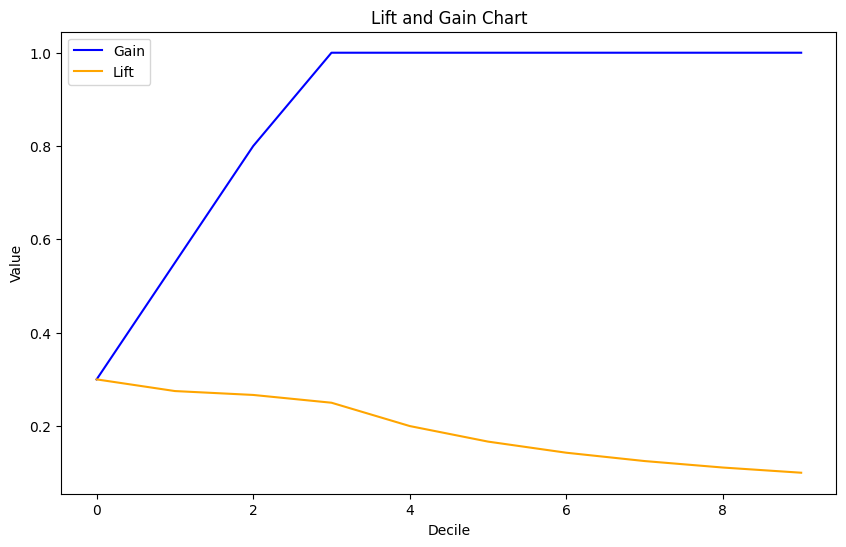

In [5]:
# Question 3
import pandas as pd

# Assuming lr_probs and nb_probs have been calculated earlier
lift_gain_data = pd.DataFrame({
    "Logistic Regression Probabilities": lr_probs,
    "Naive Bayes Probabilities": nb_probs,
    "Actual": y_test.map({'Adelie': 0, 'Gentoo': 1})  # Map species to binary labels
})

# Sort data by Logistic Regression probabilities
lift_gain_data = lift_gain_data.sort_values(by="Logistic Regression Probabilities", ascending=False).reset_index(drop=True)

# Add deciles (divide into 10 equal groups)
lift_gain_data['Decile'] = pd.qcut(lift_gain_data.index, 10, labels=False)

# Aggregate metrics
gain_chart = lift_gain_data.groupby('Decile').agg(
    Actual_Sum=('Actual', 'sum'),
    Count=('Actual', 'count')
)

gain_chart['Cumulative Actual'] = gain_chart['Actual_Sum'].cumsum()
gain_chart['Gain'] = gain_chart['Cumulative Actual'] / gain_chart['Actual_Sum'].sum()
gain_chart['Lift'] = gain_chart['Gain'] / (gain_chart.index + 1)

# Plot Gain and Lift Charts
plt.figure(figsize=(10, 6))

# Gain
plt.plot(gain_chart.index, gain_chart['Gain'], label="Gain", color="blue")
# Lift
plt.plot(gain_chart.index, gain_chart['Lift'], label="Lift", color="orange")

plt.xlabel("Decile")
plt.ylabel("Value")
plt.title("Lift and Gain Chart")
plt.legend()
plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_path = 'MNIST_CSV/mnist_test.csv'  # Update with the correct file path
mnist_data = pd.read_csv(data_path)

# Rename the first column to 'label' for clarity
mnist_data.rename(columns={mnist_data.columns[0]: 'label'}, inplace=True)

# Separate features (pixel values) and labels
X = mnist_data.drop(columns=['label'])
y = mnist_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)

print("Naive Bayes Results")
print(f"Accuracy: {nb_accuracy:.2f}")
print("Classification Report:")
print(nb_classification_report)

# Apply Logistic Regression
lr_classifier = LogisticRegression(
    max_iter=500, solver='saga', multi_class='multinomial', random_state=42
)
lr_classifier.fit(X_train_scaled, y_train)
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_classification_report = classification_report(y_test, y_pred_lr)

print("Logistic Regression Results")
print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:")
print(lr_classification_report)

Naive Bayes Results
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       196
           1       0.74      0.94      0.83       227
           2       0.89      0.23      0.36       207
           3       0.64      0.40      0.49       202
           4       0.73      0.20      0.32       196
           5       0.58      0.08      0.14       178
           6       0.50      0.95      0.66       192
           7       0.87      0.34      0.49       205
           8       0.34      0.45      0.39       195
           9       0.37      0.94      0.53       202

    accuracy                           0.55      2000
   macro avg       0.64      0.55      0.50      2000
weighted avg       0.65      0.55      0.51      2000



/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Results
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       196
           1       0.94      0.98      0.96       227
           2       0.90      0.88      0.89       207
           3       0.88      0.90      0.89       202
           4       0.90      0.89      0.90       196
           5       0.89      0.80      0.85       178
           6       0.92      0.94      0.93       192
           7       0.89      0.91      0.90       205
           8       0.88      0.86      0.87       195
           9       0.89      0.90      0.89       202

    accuracy                           0.91      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.91      0.90      2000

